# Posterior Approximation for a Binomial model for Graph

We can express a binomial model dedicated to graphs as an exponential model :

$$P(y | n \theta) = exp[\theta_1 t_{none\_edge}(y) + \theta_2 t_{edge}(y) ] $$

Where $y$ is a **graph realisation (an observation)**
* $t[y] = [t_{none\_edge}(y), t_{edge}(y)]$ the vector of sufficient statistics: $t_{none\_edge}(y) = none\_edge\_count(y), t_{edge}(y) = edge\_count(y)$

And then express the posterior distribution of $\theta$ for a Binomial model:

$$P(\theta | y, n) \propto P(y | n, \theta) p(\theta) = exp[\theta_1 t_{none\_edge}(y) + \theta_2 t_{edge}(y) ] P(\theta)$$


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from math import exp

In [34]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    theta = [d[1] for d in data]
    data_frame = pd.DataFrame({'theta2': theta})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'theta2': [theta[1] for theta in data2['theta2'].items() if theta[0] % 10 == 0]})
    return data_frame

def summary(data):
    print("========== Q1 ==========")
    q_25 = np.percentile(data['theta2'], 25)
    print("Q1 for p parameter {}".format(q_25))
    print("========== Median ==========")
    q_50 = np.percentile(data['theta2'], 50)
    print("Median for p parameter {}".format(q_50))
    avg = np.mean(data['theta2'])
    print("========== Mean ==========")
    print("Mean for p parameter {}".format(avg))
    q_75 = np.percentile(data['theta2'], 75)
    print("========== Q3 ==========")
    print("Q3 for p parameter {}".format(q_75))

### First result
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [1, 10]$ ($\theta_1$ is fixed)
* $y \sim Bernouilli\_graph\_sampler(\theta_1 = 1, \theta_2 = 1, iter=100)$
* $\Delta=[0.05,0.05]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [24]:
FILE_NAME_1 = 'assets/exp1.json'

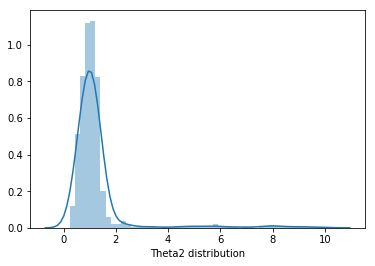

In [25]:
data1 = extract_from_file(FILE_NAME_1)
sns.distplot(data1['theta2'], axlabel="Theta2 distribution")

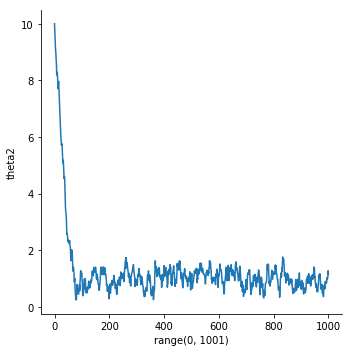

In [26]:
sns.relplot(x=range(len(data1['theta2'])),y='theta2', data=data1, kind='line', legend='brief')

### Second result
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [1, 10]$ ($\theta_1$ is fixed)
* $y \sim Metropolis\_hasting\_sampler(\theta_1 = 1, \theta_2 = 1, iter=100)$
* $\Delta=[0.05,0.05]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [20]:
FILE_NAME_2 = 'assets/exp2.json'

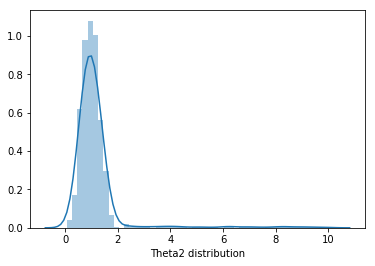

In [21]:
data2 = extract_from_file(FILE_NAME_2)
sns.distplot(data2['theta2'], axlabel="Theta2 distribution")

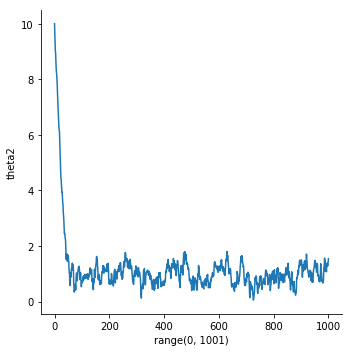

In [30]:
sns.relplot(x=range(len(data2['theta2'])),y='theta2', data=data2, kind='line', legend='brief')

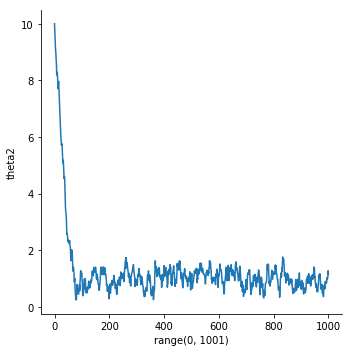

In [28]:
sns.relplot(x=range(len(data1['theta2'])),y='theta2', data=data1, kind='line', legend='brief')

In [35]:
summary(data1)

========== Q1 ==========
Q1 for p parameter 0.801292539488533
========== Median ==========
Median for p parameter 1.015821201387846
========== Mean ==========
Mean for p parameter 1.2528624697045927
========== Q3 ==========
Q3 for p parameter 1.2439670114169388


In [36]:
summary(data2)

========== Q1 ==========
Q1 for p parameter 0.7418988384854176
========== Median ==========
Median for p parameter 0.972792488590135
========== Mean ==========
Mean for p parameter 1.157288994519456
========== Q3 ==========
Q3 for p parameter 1.2200723825648725
